In [ ]:
from IPython.display import display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [245]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = pd.read_csv("Datasets/Sports_Football_1872_2025.csv")


# Country Color Coding
color_code = {
    "Finland": "#003580",  # Blue
    "Sweden": "#FECC02",  # Yellow  # FFDA00 
    "Norway": "#EF2B2D",  # Red
    "Estonia": "#0072CE",  # Blue
    "Denmark": "#C60C30",  # Red
    "Brazil": "#007A33",  # Green
    "France": "#002395",  # Blue
    "Germany": "#FFCC00",  # Black
    "Argentina": "#75AADB",  # Light Blue
    "England": "#D81E05",  # Red
    "Hungary": "#C84E42",  # Red
    "Italy": "#006400",  # Green
    "Bangladesh": "#006A4E",  # Green
    "India": "#FF9933",  # Saffron/Orange
    "South Korea": "#0F64CD",  # Saffron/Orange
    "Mexico": "#006341",  # Saffron/Orange
    "Saudi Arabia": "#165d31",  # Saffron/Orange
    "Egypt": "#C09300", 
    "United States": "#B31942", 
    "Spain": "#AA151B", 
    "Japan": "#BC002D",
    "Azerbaijan": "#0092BC",
    "Greece": "#0D5EAF",
    "Poland": "#DC143C",
    "Portugal": "#046A38",
    "Greece": "#0D5EAF",
    "Turkey": "#C8102E",
    "Wales": "#00B140",
    "Default": "#000000",
    "general_palettes" : ['00afb9', '0081a7', '5fa8d3'],
    "blue_color": '#1f77b4',  
    "orange_color": '#ff7f0e'
}

def get_country_color(country):
    """Helper function to get color for a country"""
    return color_code.get(country, color_code["Default"])

<h1 style="line-height:3rem;">1. Total Matches played by a specific country against specific opponent </h1>


Match Count: Finland vs Opponents (1990-2022, 10-year intervals)


,Finland vs Sweden,Finland vs Norway,Finland vs Denmark
Year_Group,,,
1990,3.000000,2.000000,2.000000
2000,4.000000,3.000000,2.000000
2010,6.000000,1.000000,1.000000
2020,1.000000,1.000000,1.000000
Total,14.000000,7.000000,6.000000
Average,3.500000,1.750000,1.500000
Std Dev,2.081666,0.957427,0.577350


<Figure size 1200x600 with 0 Axes>

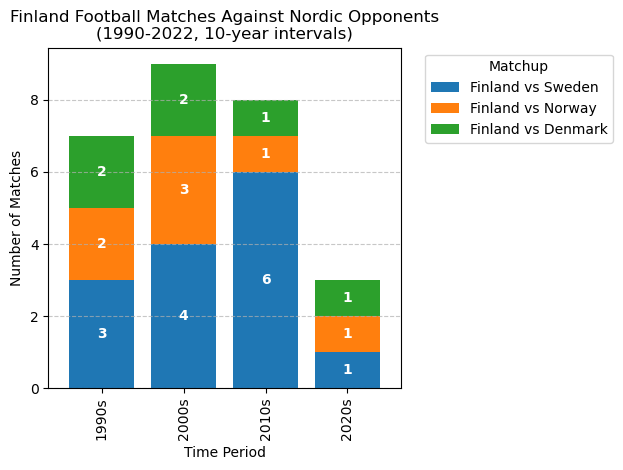

0

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def total_matches_count_with_plot(df, team='Finland', opponents=['Sweden', 'Norway', 'Denmark'], interval=20, start_year=1880, end_year=2024):
    """
    Visualizes matches played by a specified team against opponents in time intervals with both table and plot.
    
    Args:
        df: DataFrame containing match data
        team: The main team to analyze (default 'Finland')
        opponents: List of opponent teams (default ['Sweden', 'Norway', 'Denmark'])
        interval: Years per time group (default 20)
        start_year: First year to include (default 1880)
        end_year: Last year to include (default 2024)
    """
    # Filter by year range first
    df = df.copy()
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    df_filtered = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)]
    
    # Filter matches where the team played against any of the opponents
    matches = df_filtered[
        ((df_filtered['Home_team'] == team) & (df_filtered['Away_team'].isin(opponents))) |
        ((df_filtered['Away_team'] == team) & (df_filtered['Home_team'].isin(opponents)))
    ].copy()
    
    # Create complete range of year groups
    min_year = matches['Year'].min() if not matches.empty else start_year
    max_year = matches['Year'].max() if not matches.empty else end_year
    all_year_groups = pd.DataFrame({
        'Year_Group': range((start_year // interval) * interval, 
                          ((end_year // interval) + 1) * interval, 
                          interval)
    })
    
    # Create time groups for matches
    matches['Year_Group'] = (matches['Year'] // interval) * interval
    
    # Create a table of matches against each opponent by time period
    results = []
    for opponent in opponents:
        # Filter matches against this opponent
        opp_matches = matches[
            ((matches['Home_team'] == team) & (matches['Away_team'] == opponent)) |
            ((matches['Away_team'] == team) & (matches['Home_team'] == opponent))
        ]
        
        # Count matches by time period
        counts = opp_matches['Year_Group'].value_counts().sort_index()
        
        # Create a Series with all time periods (including zeros)
        full_counts = pd.Series(0, index=all_year_groups['Year_Group'])
        full_counts.update(counts)
        
        results.append(full_counts)
    
    # Create the result DataFrame
    result_df = pd.concat(results, axis=1)
    result_df.columns = [f"{team} vs {opp}" for opp in opponents]
    
    # Calculate statistics before adding summary rows
    data_for_stats = result_df.copy()
    
    # Add summary rows
    result_df.loc['Total'] = data_for_stats.sum()
    result_df.loc['Average'] = data_for_stats.mean()
    result_df.loc['Std Dev'] = data_for_stats.std()
    
    # Create styled table
    styled_table = result_df.style
    
    # Apply gradient only to non-summary rows
    non_summary_rows = result_df.index[:-3]
    styled_table = styled_table.background_gradient(
        cmap='Blues', 
        subset=(non_summary_rows, result_df.columns)
    )
    
    # Format numbers
    styled_table = styled_table.format({
        'Average': '{:.2f}',
        'Std Dev': '{:.2f}'
    })
    
    # Display the table with styling
    print(f"\n{'='*70}\nMatch Count: {team} vs Opponents ({start_year}-{end_year}, {interval}-year intervals)\n{'='*70}")
    display(styled_table)
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    # Prepare data for plotting (exclude summary rows)
    plot_data = result_df.iloc[:-3].copy()
    plot_data.index = plot_data.index.astype(str) + 's'  # Add 's' to year groups
    
    # Create stacked bar plot
    ax = plot_data.plot(kind='bar', stacked=True, width=0.8)
    
    plt.title(f'{team} Football Matches Against Nordic Opponents\n({start_year}-{end_year}, {interval}-year intervals)')
    plt.xlabel('Time Period')
    plt.ylabel('Number of Matches')
    plt.legend(title='Matchup', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add value labels on each bar segment
    for container in ax.containers:
        ax.bar_label(container, label_type='center', fmt='%d', padding=0, color='white', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    return 0

# Example usage
total_matches_count_with_plot(df, team='Finland', opponents=['Sweden', 'Norway', 'Denmark'], interval=10, start_year=1990, end_year=2022)

From follwing table we can say before 1990's more matches had been played which range between 7 to 10 in every 10 years.

Finland played most matches with Sweden compared to other Nordic countries.


--- Sweden ---


,Year Interval,Opponent,Total Matches,Win,Loss,Draw,Win %,Loss %,Draw %,Avg Win Rate
0,1990-1999,Sweden,3,0,3,0,0.000000,100.000000,0.000000,0.000000
1,2000-2009,Sweden,4,1,2,1,25.000000,50.000000,25.000000,0.250000
2,2010-2019,Sweden,6,2,4,0,33.330000,66.670000,0.000000,0.330000
3,2020-2029,Sweden,1,0,1,0,0.000000,100.000000,0.000000,0.000000
4,TOTAL,Sweden,14,3,10,1,21.430000,71.430000,7.140000,0.210000



--- Norway ---


,Year Interval,Opponent,Total Matches,Win,Loss,Draw,Win %,Loss %,Draw %,Avg Win Rate
0,1990-1999,Norway,2,0,1,1,0.000000,50.000000,50.000000,0.000000
1,2000-2009,Norway,3,1,2,0,33.330000,66.670000,0.000000,0.330000
2,2010-2019,Norway,1,0,1,0,0.000000,100.000000,0.000000,0.000000
3,2020-2029,Norway,1,0,0,1,0.000000,0.000000,100.000000,0.000000
4,TOTAL,Norway,7,1,4,2,14.290000,57.140000,28.570000,0.140000



--- Denmark ---


,Year Interval,Opponent,Total Matches,Win,Loss,Draw,Win %,Loss %,Draw %,Avg Win Rate
0,1990-1999,Denmark,2,0,2,0,0.000000,100.000000,0.000000,0.000000
1,2000-2009,Denmark,2,0,1,1,0.000000,50.000000,50.000000,0.000000
2,2010-2019,Denmark,1,0,1,0,0.000000,100.000000,0.000000,0.000000
3,2020-2029,Denmark,1,1,0,0,100.000000,0.000000,0.000000,1.000000
4,TOTAL,Denmark,6,1,4,1,16.670000,66.670000,16.670000,0.170000


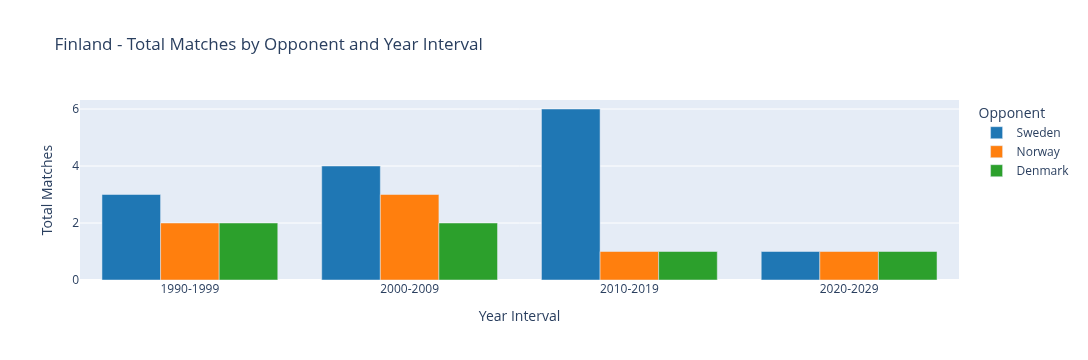

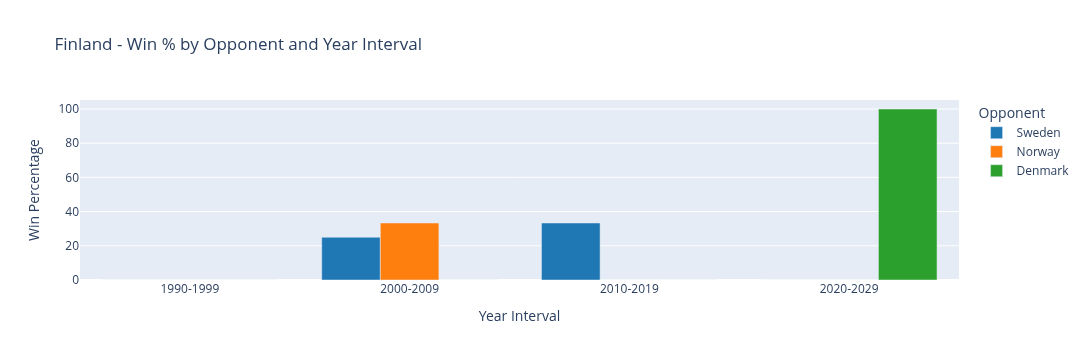

In [23]:
import pandas as pd
import plotly.express as px

def get_country_color(country):
    color_map = {
        "Sweden": "#1f77b4",
        "Norway": "#ff7f0e",
        "Denmark": "#2ca02c",
        "Finland": "#d62728"
    }
    return color_map.get(country, "#7f7f7f")

def load_football_data(filepath):
    return pd.read_csv(filepath)

def add_year_and_result(df, team_1):
    df['Year'] = pd.to_datetime(df['Date']).dt.year

    def get_result(row):
        if row['Home_team'] == team_1 and row['home_score'] > row['away_score']:
            return "Win"
        elif row['Away_team'] == team_1 and row['away_score'] > row['home_score']:
            return "Win"
        elif row['home_score'] == row['away_score']:
            return "Draw"
        else:
            return "Loss"

    df['Result'] = df.apply(get_result, axis=1)
    return df

def generate_year_interval(df, start_year, end_year, interval):
    df = df[(df['Year'] >= start_year) & (df['Year'] <= end_year)].copy()
    df['Year Interval'] = df['Year'].apply(lambda x: f"{(x - start_year) // interval * interval + start_year}-"
                                                    f"{(x - start_year) // interval * interval + start_year + interval - 1}")
    return df

def calculate_match_stats(df, team_1, opponent, interval, start_year, end_year):
    df_filtered = df[
        (((df['Home_team'] == team_1) & (df['Away_team'] == opponent)) |
         ((df['Home_team'] == opponent) & (df['Away_team'] == team_1)))
    ].copy()

    if df_filtered.empty:
        return pd.DataFrame()

    df_filtered = add_year_and_result(df_filtered, team_1)
    df_filtered = generate_year_interval(df_filtered, start_year, end_year, interval)

    grouped = df_filtered.groupby('Year Interval')['Result'].value_counts().unstack(fill_value=0).reset_index()
    grouped['Opponent'] = opponent
    grouped['Total Matches'] = grouped[['Win', 'Draw', 'Loss']].sum(axis=1)
    grouped['Win %'] = (grouped['Win'] / grouped['Total Matches'] * 100).round(2)
    grouped['Loss %'] = (grouped['Loss'] / grouped['Total Matches'] * 100).round(2)
    grouped['Draw %'] = (grouped['Draw'] / grouped['Total Matches'] * 100).round(2)

    return grouped[['Year Interval', 'Opponent', 'Total Matches', 'Win', 'Loss', 'Draw', 'Win %', 'Loss %', 'Draw %']]

def match_result_analysis(df, team_1, opponents, interval, start_year, end_year):
    all_results = []
    for opponent in opponents:
        stats = calculate_match_stats(df, team_1, opponent, interval, start_year, end_year)
        if not stats.empty:
            all_results.append(stats)
    return pd.concat(all_results, ignore_index=True)

def display_results_table(results_df):
    opponents = results_df['Opponent'].unique()

    for opponent in opponents:
        print(f"\n--- {opponent} ---")
        sub_df = results_df[results_df['Opponent'] == opponent].copy()

        # Cumulative stats
        total_matches = sub_df['Total Matches'].sum()
        total_wins = sub_df['Win'].sum()
        total_losses = sub_df['Loss'].sum()
        total_draws = sub_df['Draw'].sum()

        # Append TOTAL row
        total_row = pd.DataFrame([{
            "Year Interval": "TOTAL",
            "Opponent": opponent,
            "Total Matches": total_matches,
            "Win": total_wins,
            "Loss": total_losses,
            "Draw": total_draws,
            "Win %": round((total_wins / total_matches) * 100, 2) if total_matches > 0 else 0,
            "Loss %": round((total_losses / total_matches) * 100, 2) if total_matches > 0 else 0,
            "Draw %": round((total_draws / total_matches) * 100, 2) if total_matches > 0 else 0,
        }])

        combined_df = pd.concat([sub_df, total_row], ignore_index=True)

        # Add Average Win Rate column
        combined_df['Avg Win Rate'] = (combined_df['Win'] / combined_df['Total Matches']).round(2)

        # Display table
        styled = combined_df.style.background_gradient(
            subset=["Total Matches", "Win", "Loss", "Draw", "Win %", "Loss %", "Draw %", "Avg Win Rate"],
            cmap='Blues'
        ).set_properties(**{'text-align': 'center'}).set_table_styles(
            [dict(selector='th', props=[('text-align', 'center')])]
        )
        display(styled)

        # Print summary of averages (excluding TOTAL row)
        avg_stats = sub_df[["Total Matches", "Win %", "Loss %", "Draw %"]].mean().round(2)
        # print("Average Stats (Per Interval):")  ###############################
        # print(avg_stats)

def visualize_results(results_df, team_1):
    plot_data = results_df.copy()
    color_map = {team: get_country_color(team) for team in plot_data['Opponent'].unique()}

    fig1 = px.bar(
        plot_data,
        x='Year Interval',
        y='Total Matches',
        color='Opponent',
        color_discrete_map=color_map,
        barmode='group',
        title=f'{team_1} - Total Matches by Opponent and Year Interval'
    )
    fig1.update_layout(xaxis_title='Year Interval', yaxis_title='Total Matches', xaxis_tickangle=0)
    fig1.show()

    fig2 = px.bar(
        plot_data,
        x='Year Interval',
        y='Win %',
        color='Opponent',
        color_discrete_map=color_map,
        barmode='group',
        title=f'{team_1} - Win % by Opponent and Year Interval'
    )
    fig2.update_layout(xaxis_title='Year Interval', yaxis_title='Win Percentage', xaxis_tickangle=0)
    fig2.show()

def run_team_analysis(filepath, team_1, opponents, interval=10, start_year=1960, end_year=2022):
    df = load_football_data(filepath)
    results_df = match_result_analysis(df, team_1, opponents, interval, start_year, end_year)

    if results_df.empty:
        print("No match data found for the specified criteria.")
        return

    display_results_table(results_df)
    visualize_results(results_df, team_1)

# Example usage
run_team_analysis(
    filepath="Datasets/Sports_Football_1872_2025.csv",
    team_1="Finland",
    opponents=["Sweden", "Norway", "Denmark"],
    interval=10,
    start_year=1990,
    end_year=2022
)



⚽ Goal Stats Analysis for Finland:

📊 Finland vs Sweden - Goal Summary:


,Year Interval,Opponent,Goals Scored,Goals Conceded,Match Number
0,1990-1999,Sweden,2.000000,10.000000,3
1,2000-2009,Sweden,2.000000,4.000000,4
2,2010-2019,Sweden,3.000000,13.000000,6
3,2020-2029,Sweden,0.000000,4.000000,2
4,TOTAL,Sweden,7.000000,31.000000,15
5,AVERAGE (per match),Sweden,0.470000,2.070000,
6,STD DEV (per match),Sweden,0.250000,0.830000,



📊 Finland vs Norway - Goal Summary:


,Year Interval,Opponent,Goals Scored,Goals Conceded,Match Number
0,1990-1999,Norway,1.000000,5.000000,2
1,2000-2009,Norway,5.000000,6.000000,3
2,2010-2019,Norway,0.000000,2.000000,1
3,2020-2029,Norway,1.000000,1.000000,1
4,TOTAL,Norway,7.000000,14.000000,7
5,AVERAGE (per match),Norway,1.000000,2.000000,
6,STD DEV (per match),Norway,0.620000,0.540000,



📊 Finland vs Denmark - Goal Summary:


,Year Interval,Opponent,Goals Scored,Goals Conceded,Match Number
0,1990-1999,Denmark,1.000000,3.000000,2
1,2000-2009,Denmark,1.000000,2.000000,2
2,2010-2019,Denmark,1.000000,2.000000,1
3,2020-2029,Denmark,2.000000,4.000000,3
4,TOTAL,Denmark,5.000000,11.000000,8
5,AVERAGE (per match),Denmark,0.620000,1.380000,
6,STD DEV (per match),Denmark,0.200000,0.360000,


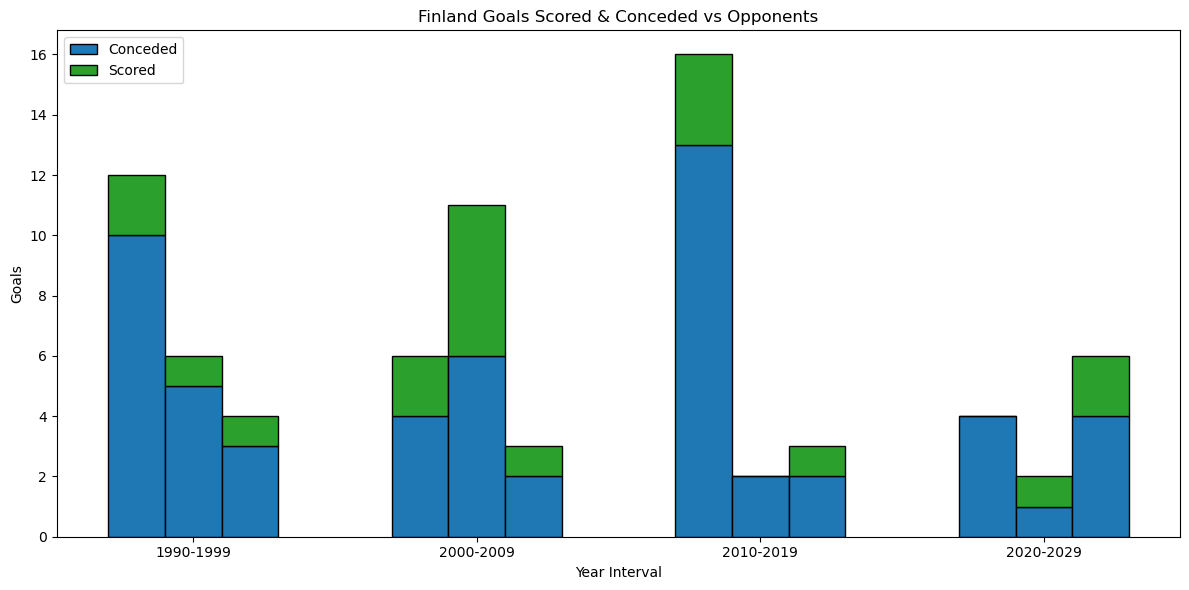


⚽ Goal Stats Analysis for Sweden:

📊 Sweden vs Norway - Goal Summary:


,Year Interval,Opponent,Goals Scored,Goals Conceded,Match Number
0,1990-1999,Norway,8.000000,4.000000,4
1,2000-2009,Norway,3.000000,7.000000,4
2,2010-2019,Norway,9.000000,7.000000,5
3,2020-2029,Norway,3.000000,5.000000,2
4,TOTAL,Norway,23.000000,23.000000,15
5,AVERAGE (per match),Norway,1.530000,1.530000,
6,STD DEV (per match),Norway,0.470000,0.550000,



📊 Sweden vs Denmark - Goal Summary:


,Year Interval,Opponent,Goals Scored,Goals Conceded,Match Number
0,1990-1999,Denmark,8.000000,3.000000,6
1,2000-2009,Denmark,6.000000,4.000000,6
2,2010-2019,Denmark,5.000000,6.000000,6
3,2020-2029,Denmark,1.000000,4.000000,2
4,TOTAL,Denmark,20.000000,17.000000,20
5,AVERAGE (per match),Denmark,1.000000,0.850000,
6,STD DEV (per match),Denmark,0.300000,0.580000,



📊 Sweden vs Germany - Goal Summary:


,Year Interval,Opponent,Goals Scored,Goals Conceded,Match Number
0,1990-1999,Germany,3.000000,6.000000,2
1,2000-2009,Germany,0.000000,5.000000,2
2,2010-2019,Germany,8.000000,11.000000,4
3,TOTAL,Germany,11.000000,22.000000,8
4,AVERAGE (per match),Germany,1.380000,2.750000,
5,STD DEV (per match),Germany,0.850000,0.200000,


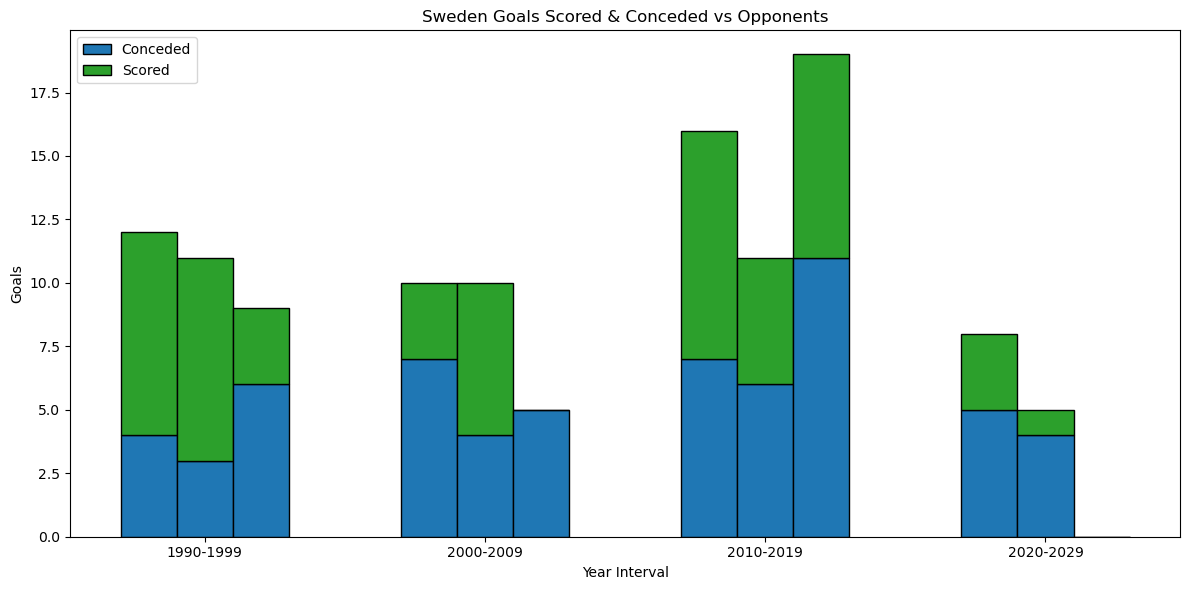

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def goal_stats_analysis_with_intervals(df, team_1, opposite_teams, interval, start_year, end_year):
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    goal_data = []

    for opponent in opposite_teams:
        for year in range(start_year, end_year + 1, interval):
            end = year + interval - 1
            interval_label = f"{year}-{end}"

            mask = (
                ((df['Home_team'] == team_1) & (df['Away_team'] == opponent)) |
                ((df['Away_team'] == team_1) & (df['Home_team'] == opponent))
            ) & df['Year'].between(year, end)

            subset = df[mask]

            if subset.empty:
                continue

            goals_scored = 0
            goals_conceded = 0
            match_number = len(subset)

            for _, row in subset.iterrows():
                if row['Home_team'] == team_1:
                    goals_scored += row['home_score']
                    goals_conceded += row['away_score']
                elif row['Away_team'] == team_1:
                    goals_scored += row['away_score']
                    goals_conceded += row['home_score']

            goal_data.append({
                "Year Interval": interval_label,
                "Opponent": opponent,
                "Goals Scored": goals_scored,
                "Goals Conceded": goals_conceded,
                "Match Number": match_number
            })

    return pd.DataFrame(goal_data)

def plot_grouped_stacked_bar(df, team_1, opposite_teams):
    intervals = sorted(df['Year Interval'].unique())
    n_intervals = len(intervals)
    n_opponents = len(opposite_teams)

    bar_width = 0.2
    x = np.arange(n_intervals)
    offsets = np.linspace(-bar_width, bar_width, n_opponents)

    colors = {'Goals Scored': '#2ca02c', 'Goals Conceded': '#1f77b4'}

    fig, ax = plt.subplots(figsize=(12, 6))
    legend_labels = []

    for i, opponent in enumerate(opposite_teams):
        opponent_df = df[df['Opponent'] == opponent].set_index('Year Interval').reindex(intervals).fillna(0)

        scored = opponent_df["Goals Scored"].values
        conceded = opponent_df["Goals Conceded"].values

        x_pos = x + offsets[i]
        ax.bar(x_pos, conceded, width=bar_width, color=colors['Goals Conceded'], edgecolor='black')
        ax.bar(x_pos, scored, width=bar_width, bottom=conceded, color=colors['Goals Scored'], edgecolor='black')

        if i == 0:
            legend_labels.append('Conceded')
            legend_labels.append('Scored')

    ax.set_xticks(x)
    ax.set_xticklabels(intervals)
    ax.set_xlabel('Year Interval')
    ax.set_ylabel('Goals')
    ax.set_title(f'{team_1} Goals Scored & Conceded vs Opponents')

    ax.legend(legend_labels, loc='upper left')
    plt.tight_layout()
    plt.show()

def run_goal_comparison(df, team_1, opposite_teams, interval, start_year, end_year):
    goal_stats = goal_stats_analysis_with_intervals(
        df, team_1=team_1, opposite_teams=opposite_teams,
        interval=interval, start_year=start_year, end_year=end_year
    )

    print(f"\n⚽ Goal Stats Analysis for {team_1}:")

    for opponent in opposite_teams:
        country_goals = goal_stats[goal_stats['Opponent'] == opponent].copy()

        total_scored = country_goals["Goals Scored"].sum()
        total_conceded = country_goals["Goals Conceded"].sum()
        total_matches = country_goals["Match Number"].sum()

        avg_scored = total_scored / total_matches if total_matches else 0
        avg_conceded = total_conceded / total_matches if total_matches else 0

        per_match_scored = []
        per_match_conceded = []

        for _, row in country_goals.iterrows():
            if row["Match Number"] > 0:
                per_match_scored.append(row["Goals Scored"] / row["Match Number"])
                per_match_conceded.append(row["Goals Conceded"] / row["Match Number"])

        std_scored = np.std(per_match_scored) if per_match_scored else 0
        std_conceded = np.std(per_match_conceded) if per_match_conceded else 0

        total_row = {
            "Year Interval": "TOTAL",
            "Opponent": opponent,
            "Goals Scored": total_scored,
            "Goals Conceded": total_conceded,
            "Match Number": total_matches
        }
        avg_row = {
            "Year Interval": "AVERAGE (per match)",
            "Opponent": opponent,
            "Goals Scored": round(avg_scored, 2),
            "Goals Conceded": round(avg_conceded, 2),
            "Match Number": ""
        }
        std_row = {
            "Year Interval": "STD DEV (per match)",
            "Opponent": opponent,
            "Goals Scored": round(std_scored, 2),
            "Goals Conceded": round(std_conceded, 2),
            "Match Number": ""
        }

        stats_df = pd.DataFrame([total_row, avg_row, std_row])
        combined_df = pd.concat([country_goals, stats_df], ignore_index=True)

        styled = combined_df.style.background_gradient(
            subset=["Goals Scored", "Goals Conceded"],
            cmap='Oranges'
        ).set_properties(**{'text-align': 'center'}).set_table_styles(
            [dict(selector='th', props=[('text-align', 'center')])]
        )

        print(f"\n📊 {team_1} vs {opponent} - Goal Summary:")
        display(styled)

    plot_grouped_stacked_bar(goal_stats, team_1, opposite_teams)




df = pd.read_csv("Datasets/Sports_Football_1872_2025.csv")

# Compare Finland
run_goal_comparison(df, team_1="Finland", opposite_teams=["Sweden", "Norway", "Denmark"], interval=10, start_year=1990, end_year=2024)

# Compare Germany
run_goal_comparison(df, team_1="Sweden", opposite_teams=["Norway", "Denmark", "Germany"], interval=10, start_year=1990, end_year=2024)


# Forward or Score by Opponent Teams

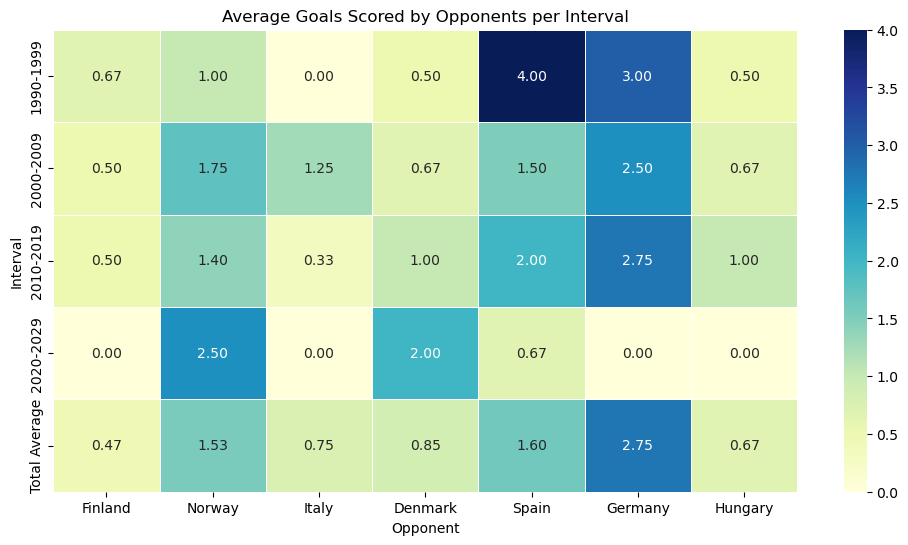

In [183]:
def detailed_defensive_summary(df, team_1="Sweden", opposite_teams=None,
                              interval_time=10, start_year=1990, end_year=2022):
    if opposite_teams is None:
        opposite_teams = ["Finland", "Hungary", "Norway", "Germany", "Italy", "Spain"]

    df['Date'] = pd.to_datetime(df['Date'])
    df['year'] = df['Date'].dt.year

    # Filter matches where team_1 played and opponent is in opposite_teams
    df_filtered = df[
        (df['year'] >= start_year) & (df['year'] <= end_year) &
        ((df['Home_team'] == team_1) | (df['Away_team'] == team_1)) &
        ((df['Home_team'].isin(opposite_teams)) | (df['Away_team'].isin(opposite_teams)))
    ]

    # Store per-interval data here
    rows = []
    
    # For summary calculations
    total_scored = {team: 0 for team in opposite_teams}
    total_matches = {team: 0 for team in opposite_teams}
    scored_goals_list = {team: [] for team in opposite_teams}

    # Loop through intervals
    for start in range(start_year, end_year + 1, interval_time):
        end = start + interval_time - 1
        interval_df = df_filtered[(df_filtered['year'] >= start) & (df_filtered['year'] <= end)]
        row = {}

        for opponent in opposite_teams:
            scored = 0
            matches = 0

            # If team_1 is home, scored goals = away_score by opponent
            home_matches = interval_df[(interval_df['Home_team'] == team_1) & (interval_df['Away_team'] == opponent)]
            scored += home_matches['away_score'].sum()
            matches += len(home_matches)
            scored_goals_list[opponent].extend(home_matches['away_score'].tolist())

            # If team_1 is away, scored goals = home_score by opponent
            away_matches = interval_df[(interval_df['Away_team'] == team_1) & (interval_df['Home_team'] == opponent)]
            scored += away_matches['home_score'].sum()
            matches += len(away_matches)
            scored_goals_list[opponent].extend(away_matches['home_score'].tolist())

            total_scored[opponent] += scored
            total_matches[opponent] += matches

            avg = scored / matches if matches else 0

            # Store data under tuple keys for MultiIndex columns
            row[(opponent, 'Scored')] = scored
            row[(opponent, 'Total Match')] = matches
            row[(opponent, 'Avg')] = round(avg, 2)

        rows.append((f"{start}-{end}", row))

    # Create dataframe from rows
    index = []
    data = []
    for interval, row in rows:
        index.append(interval)
        data.append(row)

    # Create MultiIndex columns
    tuples = []
    for opponent in opposite_teams:
        for stat in ['Scored', 'Total Match', 'Avg']:
            tuples.append((opponent, stat))

    columns = pd.MultiIndex.from_tuples(tuples, names=['Opponent', 'Statistic'])
    df_intervals = pd.DataFrame(data, index=index, columns=columns)

    # Add summary rows: Total, AVG, STD
    total_row = {}
    avg_row = {}
    std_row = {}

    for opponent in opposite_teams:
        total = total_scored[opponent]
        matches = total_matches[opponent]
        avg = total / matches if matches else 0
        std = round(np.std(scored_goals_list[opponent]), 2) if scored_goals_list[opponent] else 0

        total_row[(opponent, 'Scored')] = total
        total_row[(opponent, 'Total Match')] = matches
        total_row[(opponent, 'Avg')] = round(avg, 2)

        avg_row[(opponent, 'Scored')] = ''
        avg_row[(opponent, 'Total Match')] = ''
        avg_row[(opponent, 'Avg')] = round(avg, 2)  # fixed AVG row to show average

        std_row[(opponent, 'Scored')] = ''
        std_row[(opponent, 'Total Match')] = ''
        std_row[(opponent, 'Avg')] = std

    df_summary = pd.DataFrame(
        [total_row, avg_row, std_row],
        index=['Total', 'AVG', 'STD'],
        columns=columns
    )

    # Combine intervals and summary rows
    df_final = pd.concat([df_intervals, df_summary])

    # Add 'Interval' as first column for clarity
    df_final.reset_index(inplace=True)
    df_final.rename(columns={'index': 'Interval'}, inplace=True)

    # Style gradient for 'Avg' columns but exclude 'Total Match' and summary rows
    def highlight_gradients(s):
        is_avg = s.name[1] == 'Avg'
        if not is_avg:
            return ['' for _ in s]

        result = []
        for idx, val in enumerate(s):
            if s.index[idx] in ['Total', 'AVG', 'STD']:
                result.append('')
            else:
                try:
                    num = float(val)
                    if num > 0:
                        result.append('background-color: #a8ddb5')  # light green
                    else:
                        result.append('')
                except:
                    result.append('')
        return result

    styled = df_final.style
    styled = styled.apply(highlight_gradients, subset=pd.IndexSlice[:, pd.IndexSlice[:, 'Avg']])
    styled = styled.format(precision=2, na_rep='')

    return styled, df_final


def plot_avg_scored_heatmap(df_final, opposite_teams):
    interval_df = df_final[~df_final['Interval'].isin(['Total', 'AVG', 'STD'])].copy()

    avg_cols = [(team, 'Avg') for team in opposite_teams]
    heatmap_data = interval_df.set_index('Interval')[avg_cols]
    heatmap_data.columns = [team for team, stat in avg_cols]

    # Calculate total averages for each opponent (from summary 'Total' row)
    total_row = df_final[df_final['Interval'] == 'Total']
    total_avgs = {}
    for team in opposite_teams:
        total_scored = total_row[(team, 'Scored')].values[0]
        total_matches = total_row[(team, 'Total Match')].values[0]
        total_avg = total_scored / total_matches if total_matches else 0
        total_avgs[team] = total_avg

    # Create a DataFrame for the total average row
    total_avg_df = pd.DataFrame(total_avgs, index=['Total Average'])

    # Concatenate the new row to heatmap_data
    heatmap_data = pd.concat([heatmap_data, total_avg_df])

    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
    plt.title("Average Goals Scored by Opponents per Interval")
    plt.ylabel("Interval")
    plt.xlabel("Opponent")
    plt.show()


# Usage example:
df = pd.read_csv("Datasets/Sports_Football_1872_2025.csv")

styled_table, df_final = detailed_defensive_summary(
    df,
    team_1="Sweden",
    opposite_teams=["Finland", "Norway", "Italy", "Denmark", "Spain", "Germany", "Hungary"],
    interval_time=10,
    start_year=1990,
    end_year=2024
)

display(styled_table)  # works in Jupyter or compatible notebook

plot_avg_scored_heatmap(df_final, ["Finland", "Norway", "Italy", "Denmark", "Spain", "Germany", "Hungary"])


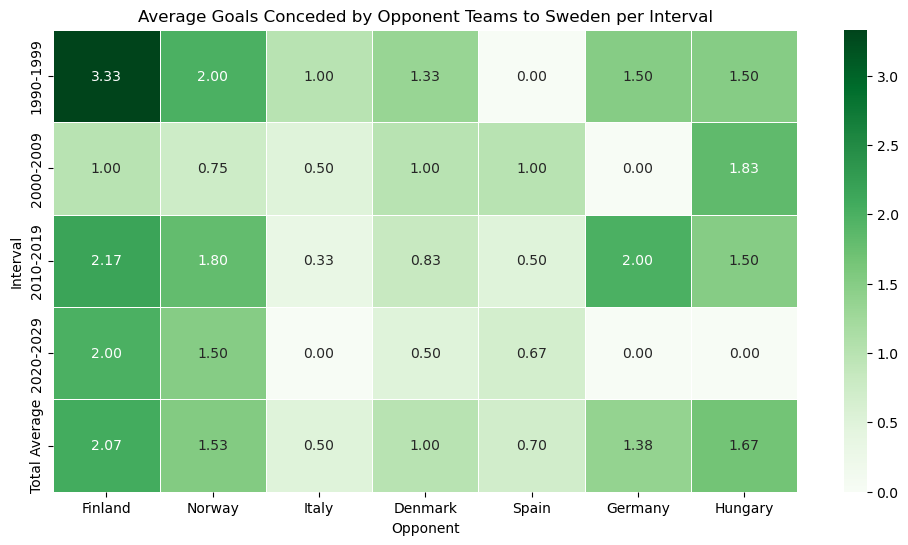

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def detailed_opponent_conceded_summary(df, team_1="Sweden", opposite_teams=None,
                                       interval_time=10, start_year=1990, end_year=2022):
    if opposite_teams is None:
        opposite_teams = ["Finland", "Hungary", "Norway", "Germany", "Italy", "Spain"]

    df['Date'] = pd.to_datetime(df['Date'])
    df['year'] = df['Date'].dt.year

    # Filter matches where team_1 played and opponent is in opposite_teams
    df_filtered = df[
        (df['year'] >= start_year) & (df['year'] <= end_year) &
        ((df['Home_team'] == team_1) | (df['Away_team'] == team_1)) &
        ((df['Home_team'].isin(opposite_teams)) | (df['Away_team'].isin(opposite_teams)))
    ]

    rows = []

    total_conceded_by_opponent = {team: 0 for team in opposite_teams}
    total_matches = {team: 0 for team in opposite_teams}
    goals_by_team1_list = {team: [] for team in opposite_teams}

    for start in range(start_year, end_year + 1, interval_time):
        end = start + interval_time - 1
        interval_df = df_filtered[(df_filtered['year'] >= start) & (df_filtered['year'] <= end)]
        row = {}

        for opponent in opposite_teams:
            conceded_by_opponent = 0
            matches = 0

            # Sweden is home, goals conceded by opponent = Sweden's home_score
            home_matches = interval_df[(interval_df['Home_team'] == team_1) & (interval_df['Away_team'] == opponent)]
            conceded_by_opponent += home_matches['home_score'].sum()
            matches += len(home_matches)
            goals_by_team1_list[opponent].extend(home_matches['home_score'].tolist())

            # Sweden is away, goals conceded by opponent = Sweden's away_score
            away_matches = interval_df[(interval_df['Away_team'] == team_1) & (interval_df['Home_team'] == opponent)]
            conceded_by_opponent += away_matches['away_score'].sum()
            matches += len(away_matches)
            goals_by_team1_list[opponent].extend(away_matches['away_score'].tolist())

            total_conceded_by_opponent[opponent] += conceded_by_opponent
            total_matches[opponent] += matches

            avg = conceded_by_opponent / matches if matches else 0

            row[(opponent, 'Conceded')] = conceded_by_opponent
            row[(opponent, 'Total Match')] = matches
            row[(opponent, 'Avg')] = round(avg, 2)

        rows.append((f"{start}-{end}", row))

    tuples = []
    for opponent in opposite_teams:
        for stat in ['Conceded', 'Total Match', 'Avg']:
            tuples.append((opponent, stat))
    columns = pd.MultiIndex.from_tuples(tuples, names=['Opponent', 'Statistic'])

    index = []
    data = []
    for interval, row in rows:
        index.append(interval)
        data.append(row)

    df_intervals = pd.DataFrame(data, index=index, columns=columns)

    # Summary rows
    total_row = {}
    avg_row = {}
    std_row = {}

    for opponent in opposite_teams:
        total = total_conceded_by_opponent[opponent]
        matches = total_matches[opponent]
        avg = total / matches if matches else 0
        std = round(np.std(goals_by_team1_list[opponent]), 2) if goals_by_team1_list[opponent] else 0

        total_row[(opponent, 'Conceded')] = total
        total_row[(opponent, 'Total Match')] = matches
        total_row[(opponent, 'Avg')] = round(avg, 2)

        avg_row[(opponent, 'Conceded')] = ''
        avg_row[(opponent, 'Total Match')] = ''
        avg_row[(opponent, 'Avg')] = round(avg, 2)

        std_row[(opponent, 'Conceded')] = ''
        std_row[(opponent, 'Total Match')] = ''
        std_row[(opponent, 'Avg')] = std

    df_summary = pd.DataFrame(
        [total_row, avg_row, std_row],
        index=['Total', 'AVG', 'STD'],
        columns=columns
    )

    df_final = pd.concat([df_intervals, df_summary])
    df_final.reset_index(inplace=True)
    df_final.rename(columns={'index': 'Interval'}, inplace=True)

    def highlight_gradients(s):
        is_avg = s.name[1] == 'Avg'
        if not is_avg:
            return ['' for _ in s]
        result = []
        for idx, val in enumerate(s):
            if s.index[idx] in ['Total', 'AVG', 'STD']:
                result.append('')
            else:
                try:
                    num = float(val)
                    if num > 0:
                        result.append('background-color: #a6d96a')  # greenish for scored/conceded by opponent
                    else:
                        result.append('')
                except:
                    result.append('')
        return result

    styled = df_final.style
    styled = styled.apply(highlight_gradients, subset=pd.IndexSlice[:, pd.IndexSlice[:, 'Avg']])
    styled = styled.format(precision=2, na_rep='')

    return styled, df_final

def plot_avg_conceded_heatmap(df_final, opposite_teams):
    interval_df = df_final[~df_final['Interval'].isin(['Total', 'AVG', 'STD'])].copy()

    avg_cols = [(team, 'Avg') for team in opposite_teams]
    heatmap_data = interval_df.set_index('Interval')[avg_cols]
    heatmap_data.columns = [team for team, stat in avg_cols]

    total_row = df_final[df_final['Interval'] == 'Total']
    total_avgs = {}
    for team in opposite_teams:
        total_conceded = total_row[(team, 'Conceded')].values[0]
        total_matches = total_row[(team, 'Total Match')].values[0]
        total_avg = total_conceded / total_matches if total_matches else 0
        total_avgs[team] = total_avg

    total_avg_df = pd.DataFrame(total_avgs, index=['Total Average'])
    heatmap_data = pd.concat([heatmap_data, total_avg_df])

    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, annot=True, cmap='Greens', fmt=".2f", linewidths=0.5)
    plt.title(f"Average Goals Conceded by Opponent Teams to {team_1} per Interval")
    plt.ylabel("Interval")
    plt.xlabel("Opponent")
    plt.show()

# Usage example:
df = pd.read_csv("Datasets/Sports_Football_1872_2025.csv")

styled_table, df_final = detailed_opponent_conceded_summary(
    df,
    team_1="Sweden",
    opposite_teams=["Finland", "Norway", "Italy", "Denmark", "Spain", "Germany", "Hungary"],
    interval_time=10,
    start_year=1990,
    end_year=2024
)

display(styled_table)
plot_avg_conceded_heatmap(df_final, ["Finland", "Norway", "Italy", "Denmark", "Spain", "Germany", "Hungary"])


Line Chart


📈 Line Chart Comparison for Finland:


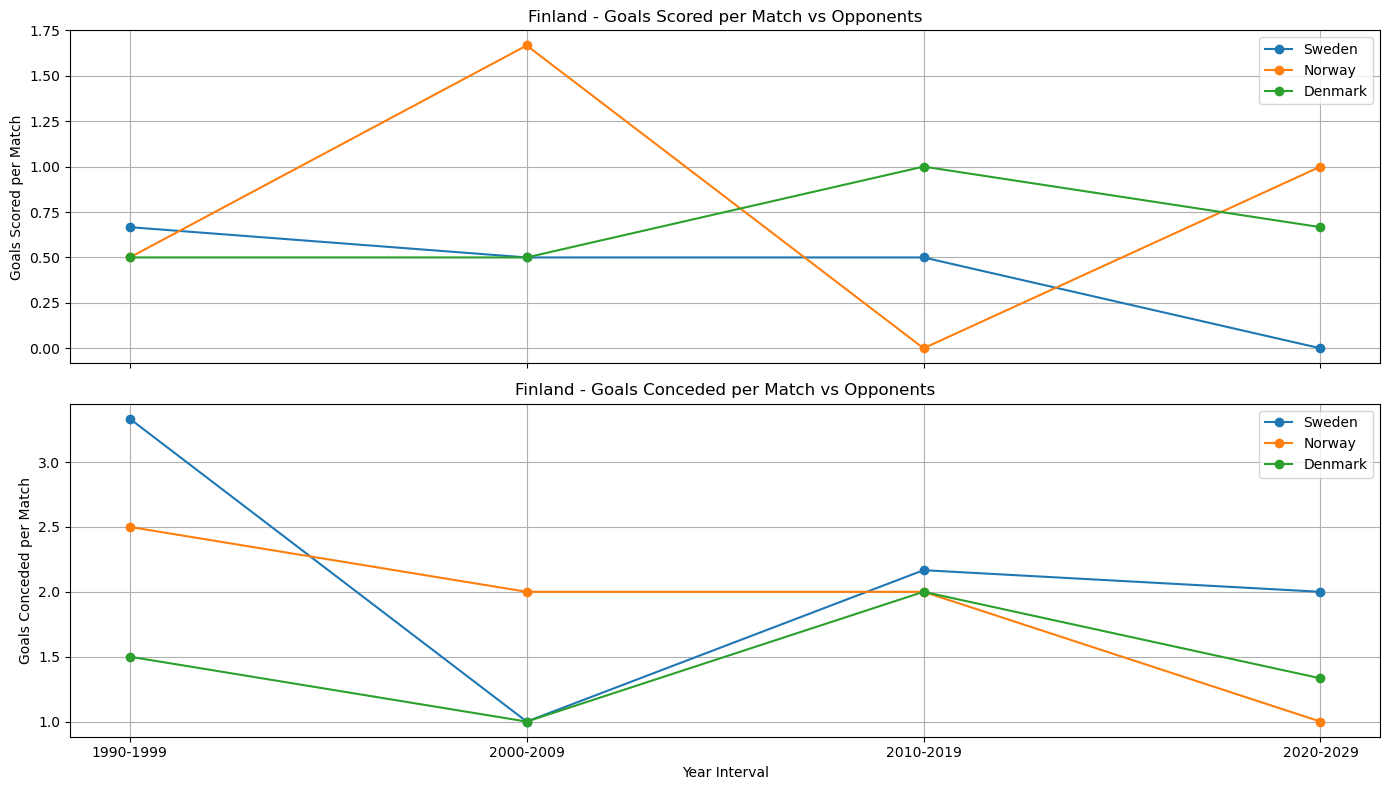


📈 Line Chart Comparison for Sweden:


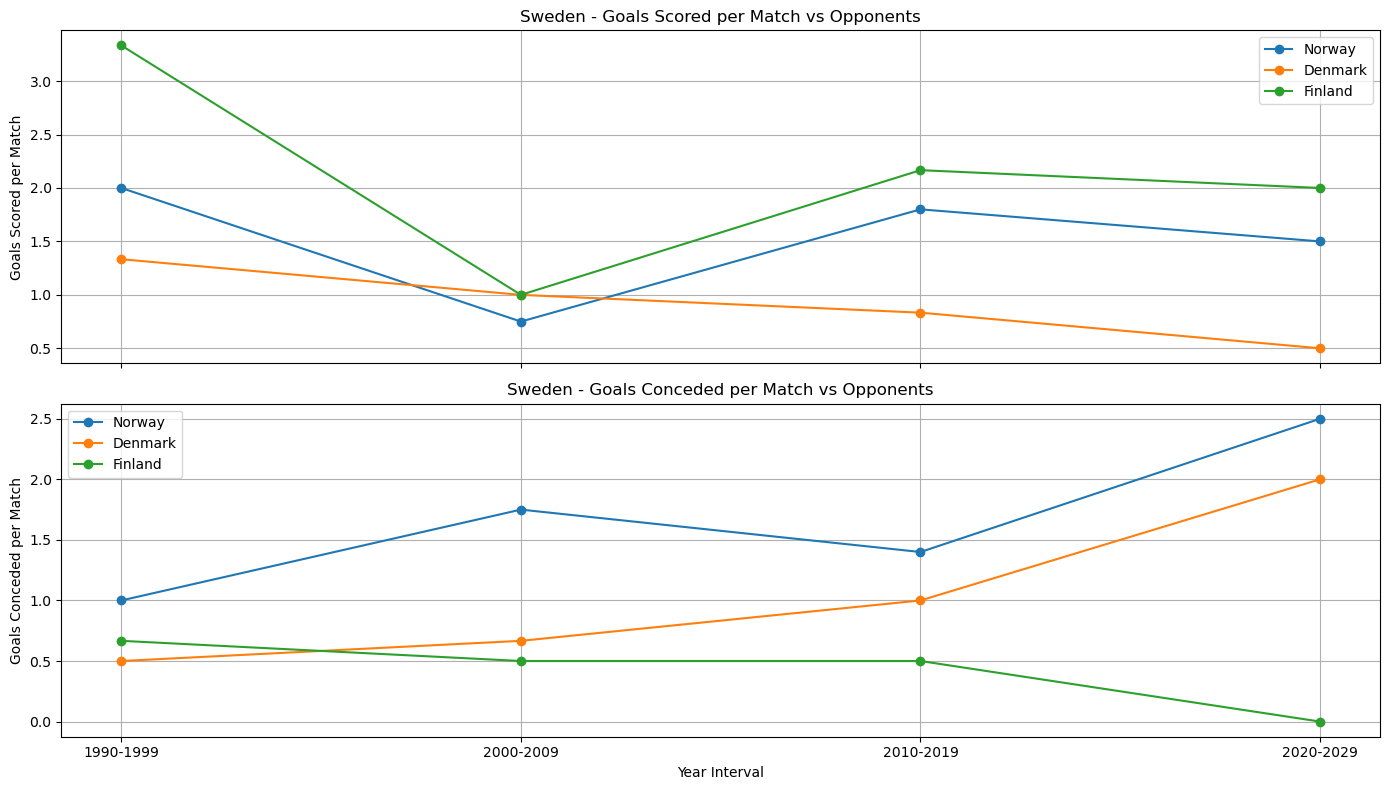

In [235]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display as ipy_display

def safe_display(obj):
    try:
        ipy_display(obj)
    except:
        print(obj)

def goal_stats_analysis_with_intervals(df, team_1, opposite_teams, interval, start_year, end_year):
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    goal_data = []

    for opponent in opposite_teams:
        for year in range(start_year, end_year + 1, interval):
            end = year + interval - 1
            interval_label = f"{year}-{end}"

            mask = (
                ((df['Home_team'] == team_1) & (df['Away_team'] == opponent)) |
                ((df['Away_team'] == team_1) & (df['Home_team'] == opponent))
            ) & df['Year'].between(year, end)

            subset = df[mask]

            if subset.empty:
                continue

            goals_scored = 0
            goals_conceded = 0
            match_number = len(subset)

            for _, row in subset.iterrows():
                if row['Home_team'] == team_1:
                    goals_scored += row['home_score']
                    goals_conceded += row['away_score']
                elif row['Away_team'] == team_1:
                    goals_scored += row['away_score']
                    goals_conceded += row['home_score']

            per_match_scored = goals_scored / match_number
            per_match_conceded = goals_conceded / match_number

            goal_data.append({
                "Year Interval": interval_label,
                "Opponent": opponent,
                "Goals Scored per Match": per_match_scored,
                "Goals Conceded per Match": per_match_conceded,
            })

    return pd.DataFrame(goal_data)

def plot_line_chart(df, team_1, opposite_teams):
    intervals = sorted(df['Year Interval'].unique(), key=lambda x: int(x.split('-')[0]))

    fig, axs = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

    for opponent in opposite_teams:
        opp_df = df[df['Opponent'] == opponent].set_index('Year Interval').reindex(intervals).fillna(0)
        axs[0].plot(intervals, opp_df["Goals Scored per Match"], marker='o', label=opponent)
        axs[1].plot(intervals, opp_df["Goals Conceded per Match"], marker='o', label=opponent)

    axs[0].set_title(f'{team_1} - Goals Scored per Match vs Opponents')
    axs[0].set_ylabel('Goals Scored per Match')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].set_title(f'{team_1} - Goals Conceded per Match vs Opponents')
    axs[1].set_ylabel('Goals Conceded per Match')
    axs[1].set_xlabel('Year Interval')
    axs[1].legend()
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

def run_goal_comparison_line_plot(df, team_1, opposite_teams, interval, start_year, end_year):
    goal_stats = goal_stats_analysis_with_intervals(
        df, team_1=team_1, opposite_teams=opposite_teams,
        interval=interval, start_year=start_year, end_year=end_year
    )

    print(f"\n📈 Line Chart Comparison for {team_1}:")
    plot_line_chart(goal_stats, team_1, opposite_teams)

# Load the dataset
df = pd.read_csv("Datasets/Sports_Football_1872_2025.csv")

# Example usage for Finland
run_goal_comparison_line_plot(df, team_1="Finland", opposite_teams=["Sweden", "Norway", "Denmark"], interval=10, start_year=1990, end_year=2024)

# Example usage for Sweden
run_goal_comparison_line_plot(df, team_1="Sweden", opposite_teams=["Norway", "Denmark", "Finland"], interval=10, start_year=1990, end_year=2024)


Max Min Scale

5. Heatmaps
Rows: Opponents

Columns: Intervals

Color intensity represents values (e.g., goals scored per match).

Use separate heatmaps for scored and conceded or combined with diverging color map.


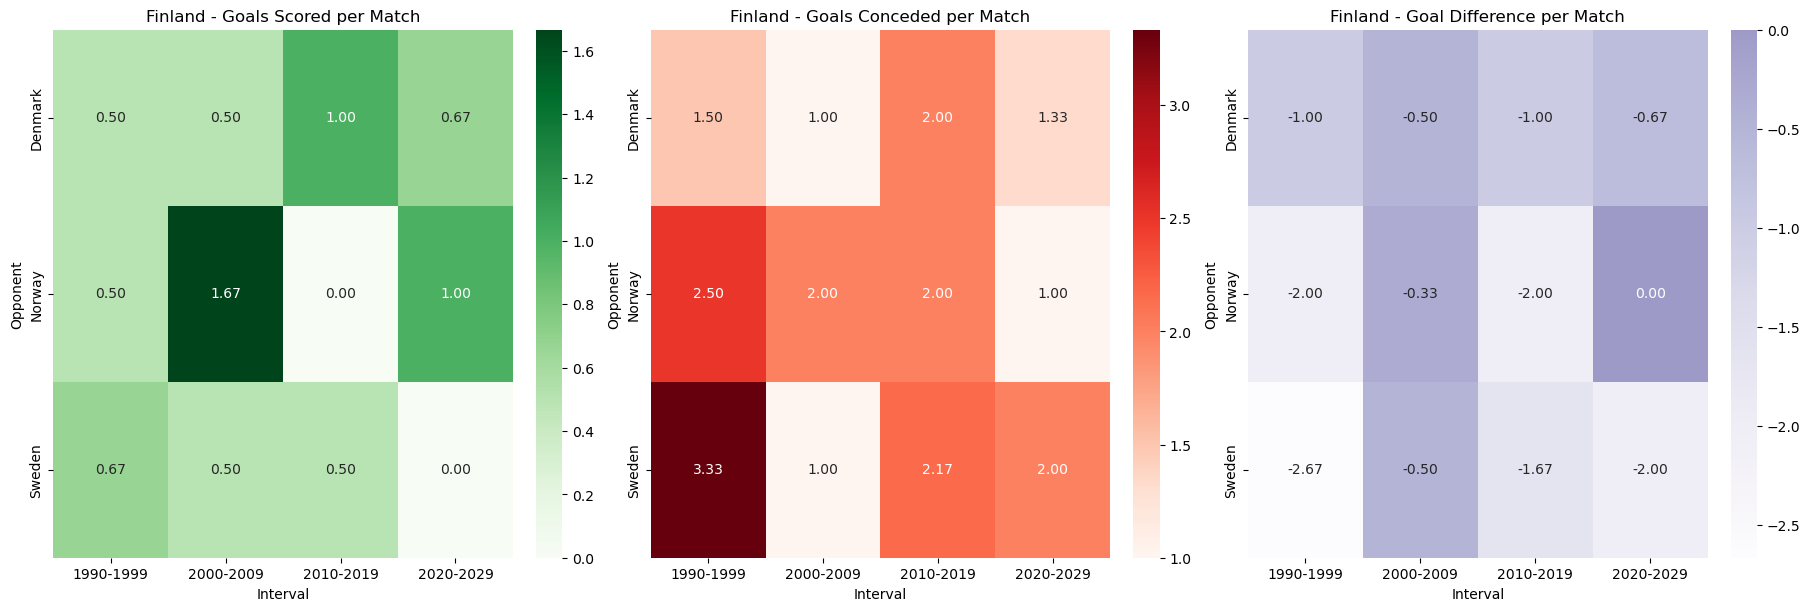

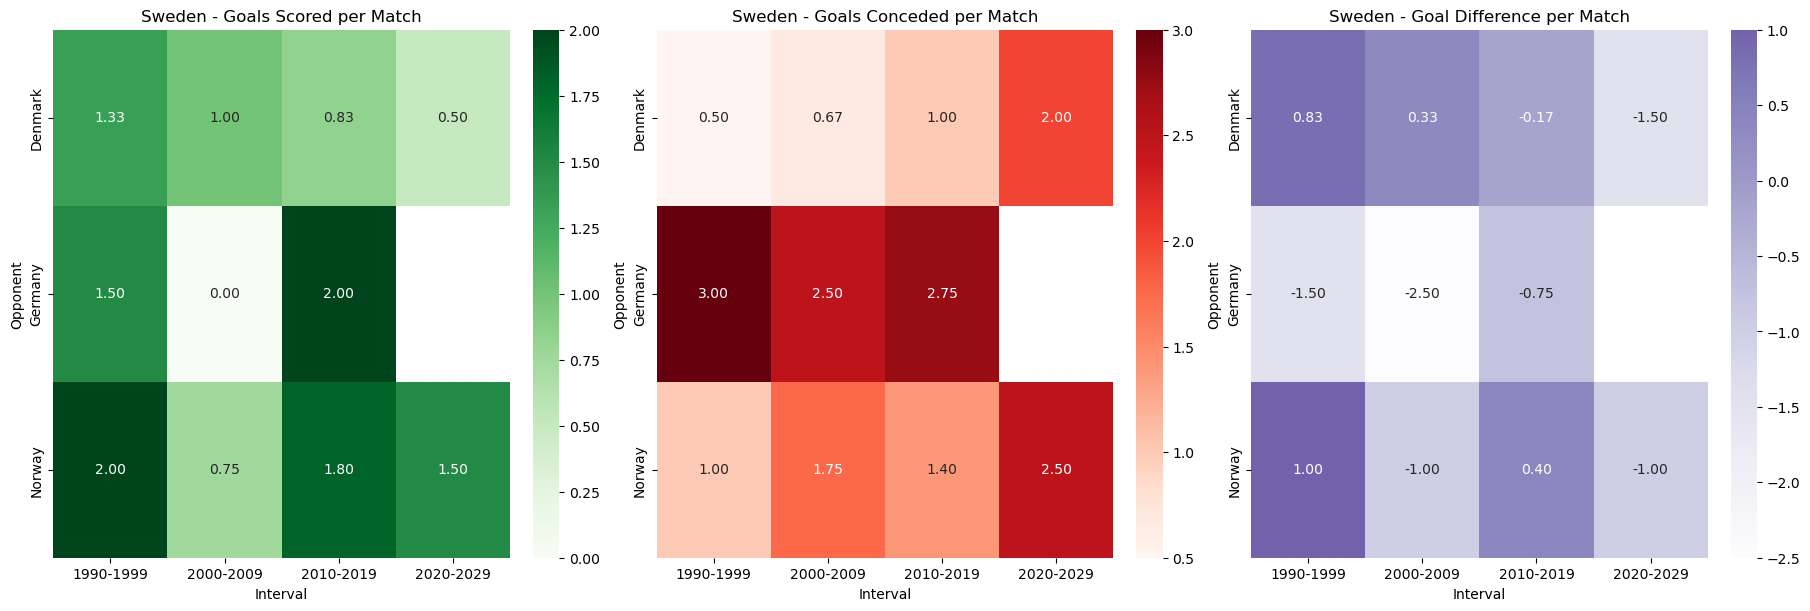

In [247]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def compute_heatmap_data(df, team_1, opposite_teams, interval, start_year, end_year):
    df['Year'] = pd.to_datetime(df['Date']).dt.year
    records = []

    for opponent in opposite_teams:
        for year in range(start_year, end_year + 1, interval):
            end = year + interval - 1
            label = f"{year}-{end}"

            mask = (
                ((df['Home_team'] == team_1) & (df['Away_team'] == opponent)) |
                ((df['Away_team'] == team_1) & (df['Home_team'] == opponent))
            ) & df['Year'].between(year, end)

            subset = df[mask]
            if subset.empty:
                continue

            scored = conceded = 0
            matches = len(subset)

            for _, row in subset.iterrows():
                if row['Home_team'] == team_1:
                    scored += row['home_score']
                    conceded += row['away_score']
                else:
                    scored += row['away_score']
                    conceded += row['home_score']

            per_match_scored = scored / matches
            per_match_conceded = conceded / matches

            records.append({
                'Opponent': opponent,
                'Interval': label,
                'Scored per Match': per_match_scored,
                'Conceded per Match': per_match_conceded,
                'Diff per Match': per_match_scored - per_match_conceded
            })

    return pd.DataFrame(records)

def plot_goal_heatmaps(heatmap_df, team_1):
    pivot_scored = heatmap_df.pivot(index='Opponent', columns='Interval', values='Scored per Match')
    pivot_conceded = heatmap_df.pivot(index='Opponent', columns='Interval', values='Conceded per Match')
    pivot_diff = heatmap_df.pivot(index='Opponent', columns='Interval', values='Diff per Match')

    fig, axs = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

    sns.heatmap(pivot_scored, cmap='Greens', annot=True, fmt=".2f", ax=axs[0])
    axs[0].set_title(f"{team_1} - Goals Scored per Match")

    sns.heatmap(pivot_conceded, cmap='Reds', annot=True, fmt=".2f", ax=axs[1])
    axs[1].set_title(f"{team_1} - Goals Conceded per Match")

    sns.heatmap(pivot_diff, cmap='Purples', center=0, annot=True, fmt=".2f", ax=axs[2])
    axs[2].set_title(f"{team_1} - Goal Difference per Match")

    plt.show()

def run_heatmap_analysis(df, team_1, opposite_teams, interval, start_year, end_year):
    heatmap_df = compute_heatmap_data(df, team_1, opposite_teams, interval, start_year, end_year)
    plot_goal_heatmaps(heatmap_df, team_1)

# Load dataset
df = pd.read_csv("Datasets/Sports_Football_1872_2025.csv")

# Example 1: Finland
run_heatmap_analysis(df, team_1="Finland", opposite_teams=["Sweden", "Norway", "Denmark"], interval=10, start_year=1990, end_year=2024)

# Example 2: Sweden
run_heatmap_analysis(df, team_1="Sweden", opposite_teams=["Norway", "Denmark", "Germany"], interval=10, start_year=1990, end_year=2024)


In [121]:
import pandas as pd

# Load dataset
df = pd.read_csv("Datasets/Sports_Football_1872_2025.csv")

# Clean and convert date
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

def most_played_opponents_matrix(df, teams, start_year=1990, end_year=2022):
    # Filter by year
    df_filtered = df[df['Year'].between(start_year, end_year)]

    # Build pair-wise match count dictionary
    match_counts = {}

    for team_1 in teams:
        match_counts[team_1] = {}
        for team_2 in teams:
            if team_1 == team_2:
                match_counts[team_1][team_2] = 0  # A team can't play itself
                continue

            # Count matches regardless of home/away order
            matches = df_filtered[
                ((df_filtered['Home_team'] == team_1) & (df_filtered['Away_team'] == team_2)) |
                ((df_filtered['Home_team'] == team_2) & (df_filtered['Away_team'] == team_1))
            ]
            match_counts[team_1][team_2] = len(matches)

    # Convert to DataFrame
    matrix_df = pd.DataFrame(match_counts).T  # Transpose for teams as rows
    return matrix_df

# Teams to compare
teams = ["Finland", "Norway", "Sweden", "Denmark", "Germany", "Hungary", "Estonia", "Turkey", 
         "Greece", "Italy", "France", "Netherlands", "Poland", 
         "Austria", "Spain", "Portugal"]

# Build and display the accurate matrix
result_matrix = most_played_opponents_matrix(df, teams, start_year=1990, end_year=2022)

# Style with heatmap
styled = result_matrix.style.background_gradient(cmap="Blues")
styled


,Finland,Norway,Sweden,Denmark,Germany,Hungary,Estonia,Turkey,Greece,Italy,France,Netherlands,Poland,Austria,Spain,Portugal
Finland,0,7,14,6,8,10,15,10,14,7,9,6,10,4,5,7
Norway,7,0,15,9,4,9,5,8,7,10,4,9,6,4,7,6
Sweden,14,15,0,19,8,12,6,10,6,8,13,7,10,13,10,9
Denmark,6,9,19,0,10,4,1,7,5,6,13,8,7,8,8,10
Germany,8,4,8,10,0,8,2,8,3,15,14,16,8,11,11,10
Hungary,10,9,12,4,8,0,6,9,11,8,3,6,9,8,2,8
Estonia,15,5,6,1,2,6,0,7,6,7,1,6,6,2,2,8
Turkey,10,8,10,7,8,9,7,0,6,6,6,12,4,7,3,5
Greece,14,7,6,5,3,11,6,6,0,4,3,4,7,6,7,9
Italy,7,10,8,6,15,8,7,6,4,0,11,13,8,5,17,10


K Means

In [87]:
print(ax.elev, ax.azim)


25 135


,Team,Avg Goals Scored,Avg Goals Conceded,Win Rate,Cluster
16,Finland,1.183594,1.171875,0.382812,0
30,India,1.412935,1.502488,0.398010,0
28,Bahrain,1.355191,1.122951,0.393443,0
25,Jordan,1.310976,0.963415,0.390244,0
22,United Arab Emirates,1.483974,1.214744,0.403846,0
21,Oman,1.444444,0.987988,0.453453,0
20,Honduras,1.440000,1.249231,0.390769,0
17,Kuwait,1.431438,1.187291,0.361204,0
15,Chile,1.332203,1.196610,0.416949,0
14,Uganda,1.241497,0.911565,0.404762,0


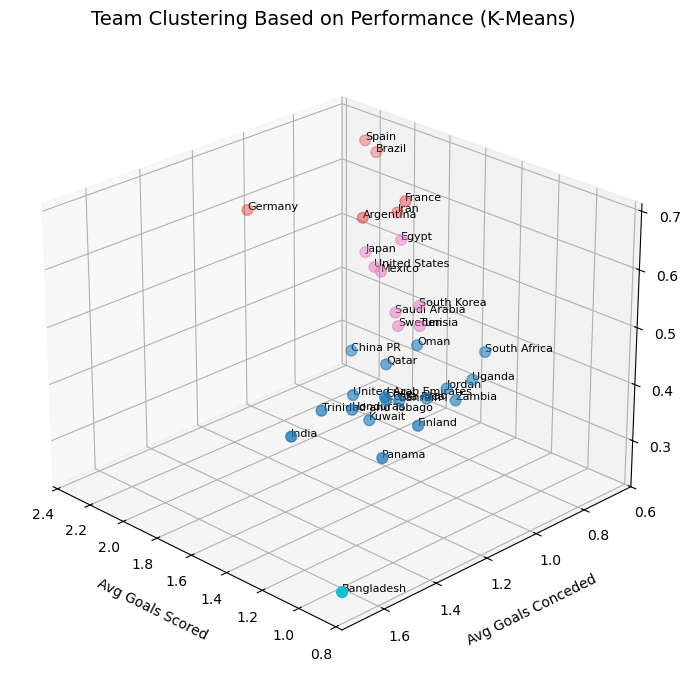

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler

def cluster_team_by_performance(df, top_n=60, start_year=2000, end_year=2022,
                                 include_team=None, team_list=None, n_clusters=4):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df = df[df['Year'].between(start_year, end_year)]

    all_teams = pd.unique(df[['Home_team', 'Away_team']].values.ravel())
    stats = []

    for team in all_teams:
        team_matches = df[(df['Home_team'] == team) | (df['Away_team'] == team)]
        if team_matches.empty:
            continue

        goals_scored = 0
        goals_conceded = 0
        wins = 0
        matches = len(team_matches)

        for _, row in team_matches.iterrows():
            if row['Home_team'] == team:
                goals_scored += row['home_score']
                goals_conceded += row['away_score']
                if row['home_score'] > row['away_score']:
                    wins += 1
            else:
                goals_scored += row['away_score']
                goals_conceded += row['home_score']
                if row['away_score'] > row['home_score']:
                    wins += 1

        stats.append({
            'Team': team,
            'Avg Goals Scored': goals_scored / matches,
            'Avg Goals Conceded': goals_conceded / matches,
            'Win Rate': wins / matches,
            'Matches': matches
        })

    df_stats = pd.DataFrame(stats)

    # Filter logic: use team_list or top_n
    if team_list:
        selected_teams = set(team_list)
    else:
        selected_teams = set(df_stats.sort_values(by='Matches', ascending=False).head(top_n)['Team'])

    if include_team:
        selected_teams.update(include_team)

    df_stats = df_stats[df_stats['Team'].isin(selected_teams)].reset_index(drop=True)

    # Normalize for clustering
    features = df_stats[['Avg Goals Scored', 'Avg Goals Conceded', 'Win Rate']]
    scaler = MinMaxScaler()
    normalized = scaler.fit_transform(features)

    # K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    df_stats['Cluster'] = kmeans.fit_predict(normalized)

    # Gradient-style display
    styled_df = df_stats[['Team', 'Avg Goals Scored', 'Avg Goals Conceded', 'Win Rate', 'Cluster']].sort_values(by='Cluster')
    display(styled_df.style.background_gradient(cmap='coolwarm', subset=['Avg Goals Scored', 'Avg Goals Conceded', 'Win Rate']))

    # 3D plot
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(
        df_stats['Avg Goals Scored'], df_stats['Avg Goals Conceded'], df_stats['Win Rate'],
        c=df_stats['Cluster'], cmap='tab10', s=60
    )

    for _, row in df_stats.iterrows():
        ax.text(row['Avg Goals Scored'], row['Avg Goals Conceded'], row['Win Rate'], row['Team'],
                size=8, zorder=1, color='black')

    ax.set_xlabel('Avg Goals Scored', labelpad=10)
    ax.set_ylabel('Avg Goals Conceded', labelpad=10)
    ax.set_zlabel('Win Rate', labelpad=10)
    ax.set_title('Team Clustering Based on Performance (K-Means)', fontsize=14)
    ax.view_init(elev=25, azim=135)
    plt.tight_layout()
    plt.show()




teams = [
    "Finland", "Norway", "Sweden", "Germany", "Hungary", "Estonia", "Turkey", 
    "Greece", "Italy", "France", "Netherlands", "Malta", "Poland", "Brazil", 
    "Austria", "Spain", "Portugal", "Morocco", "Argentina", "Israel", "Bangladesh"
]

df = pd.read_csv("Datasets/Sports_Football_1872_2025.csv")
cluster_team_by_performance(df, start_year=2000, end_year=2022, include_team=['Finland', 'Bangladesh', 'India'], top_n = 30)


In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def correlated_team_by_performance(df, start_year=2000, end_year=2022,
                                   include_team=None, top_n=30, team_list=None):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df = df[df['Year'].between(start_year, end_year)]

    all_teams = pd.unique(df[['Home_team', 'Away_team']].values.ravel())
    stats = []

    for team in all_teams:
        team_matches = df[(df['Home_team'] == team) | (df['Away_team'] == team)]
        if team_matches.empty:
            continue

        goals_scored = 0
        goals_conceded = 0
        wins = 0
        matches = len(team_matches)

        for _, row in team_matches.iterrows():
            if row['Home_team'] == team:
                goals_scored += row['home_score']
                goals_conceded += row['away_score']
                if row['home_score'] > row['away_score']:
                    wins += 1
            else:
                goals_scored += row['away_score']
                goals_conceded += row['home_score']
                if row['away_score'] > row['home_score']:
                    wins += 1

        stats.append({
            'Team': team,
            'Avg Goals Scored': goals_scored / matches,
            'Avg Goals Conceded': goals_conceded / matches,
            'Win Rate': wins / matches,
            'Matches': matches
        })

    df_stats = pd.DataFrame(stats)

    # Team selection logic
    if team_list:
        selected_teams = set(team_list)
    else:
        selected_teams = set(df_stats.sort_values(by='Matches', ascending=False).head(top_n)['Team'])

    if include_team:
        selected_teams.update(include_team)

    df_stats = df_stats[df_stats['Team'].isin(selected_teams)].reset_index(drop=True)

    # Build feature matrix for correlation
    feature_matrix = df_stats.set_index('Team')[['Avg Goals Scored', 'Avg Goals Conceded', 'Win Rate']]

    # Transpose and correlate by team
    corr_matrix = feature_matrix.T.corr(method='pearson')

    # Styled gradient correlation table
    styled = corr_matrix.style.background_gradient(cmap='crest')
    display(styled)


    return 0



teams = ["Finland", "Norway", "Sweden", "Denmark", "Germany", "Hungary", "Estonia", "Turkey", 
         "Greece", "Italy", "France", "Netherlands", "Poland", 
         "Austria", "Spain", "Portugal"]

df = pd.read_csv("Datasets/Sports_Football_1872_2025.csv")
correlated_team_by_performance(df, start_year=2000, end_year=2022,
                                include_team=['Finland'],
                                top_n=30, team_list=teams)


Team,Spain,Poland,Finland,Norway,Sweden,Portugal,Estonia,France,Greece,Austria,Hungary,Italy,Netherlands,Germany,Turkey,Denmark
Team,,,,,,,,,,,,,,,,
Spain,1.000000,0.869412,0.521176,0.746507,0.889979,0.988003,0.018385,0.996032,0.702911,0.571372,0.600996,0.966595,0.991831,0.969006,0.824646,0.904464
Poland,0.869412,1.000000,0.874795,0.977777,0.999063,0.935286,0.509989,0.909932,0.962553,0.902251,0.917414,0.967008,0.925334,0.964524,0.996438,0.997105
Finland,0.521176,0.874795,1.000000,0.956927,0.853009,0.646727,0.862887,0.595058,0.973380,0.998204,0.995346,0.722512,0.625782,0.715857,0.912538,0.835424
Norway,0.746507,0.977777,0.956927,1.000000,0.967788,0.840309,0.678990,0.802758,0.997996,0.972603,0.980452,0.892112,0.825283,0.887743,0.991974,0.959006
Sweden,0.889979,0.999063,0.853009,0.967788,1.000000,0.949725,0.472286,0.927029,0.949920,0.882745,0.899334,0.977126,0.940876,0.975045,0.991854,0.999461
Portugal,0.988003,0.935286,0.646727,0.840309,0.949725,1.000000,0.172575,0.997826,0.804325,0.691261,0.717220,0.994582,0.999631,0.995532,0.902110,0.959488
Estonia,0.018385,0.509989,0.862887,0.678990,0.472286,0.172575,1.000000,0.107290,0.724081,0.831058,0.810166,0.274036,0.145771,0.264812,0.580715,0.443107
France,0.996032,0.909932,0.595058,0.802758,0.927029,0.997826,0.107290,1.000000,0.763421,0.642140,0.669739,0.985569,0.999248,0.987145,0.871713,0.938835
Greece,0.702911,0.962553,0.973380,0.997996,0.949920,0.804325,0.724081,0.763421,1.000000,0.985363,0.990937,0.861737,0.787898,0.856838,0.981986,0.939154


0

In [209]:
import pandas as pd

df = pd.read_csv("Datasets/Sports_Football_1872_2025.csv")

def get_result(match_number=10, start_year=2000, end_year=2024, team_1="Germany", team_2="France"):
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Filter by year and teams
    filtered_df = df[(df['Date'].dt.year >= start_year) & (df['Date'].dt.year <= end_year)]
    mask = (
        ((filtered_df['Home_team'] == team_1) & (filtered_df['Away_team'] == team_2)) |
        ((filtered_df['Home_team'] == team_2) & (filtered_df['Away_team'] == team_1))
    )
    filtered_df = filtered_df[mask].sort_values(by='Date', ascending=False).copy()
    
    def match_result(row):
        if row['Home_team'] == team_1:
            if row['home_score'] > row['away_score']:
                return "Win"
            elif row['home_score'] < row['away_score']:
                return "Lost"
            else:
                return "Tie"
        else:
            if row['away_score'] > row['home_score']:
                return "Win"
            elif row['away_score'] < row['home_score']:
                return "Lost"
            else:
                return "Tie"
    
    filtered_df['Match_result'] = filtered_df.apply(match_result, axis=1)
    filtered_df['Date'] = filtered_df['Date'].dt.strftime('%Y-%m-%d')
    
    # Last matches table
    last_matches = filtered_df.head(match_number)
    display_df = last_matches[['Date', 'Home_team', 'Away_team', 'home_score', 'away_score', 'venue_country', 'Match_result']]
    
    styled_last_matches = (display_df.style
              .background_gradient(subset=['home_score', 'away_score'], cmap='YlGnBu')
              .set_properties(subset=['Date'], **{'font-weight': 'bold', 'color': '#2a3f5f'})
              .set_table_styles([
                  {'selector': 'th', 'props': [('background-color', '#f0f0f0'), ('color', '#333'), ('font-weight', 'bold')]},
                  {'selector': 'td', 'props': [('padding', '8px')]},
              ]))
    
    # Overall summary for both teams
    def team_stats(team):
        total = len(filtered_df)
        wins = 0
        for _, row in filtered_df.iterrows():
            if row['Home_team'] == team:
                if row['home_score'] > row['away_score']:
                    wins += 1
            elif row['Away_team'] == team:
                if row['away_score'] > row['home_score']:
                    wins += 1
        return total, wins
    
    total_1, wins_1 = team_stats(team_1)
    total_2, wins_2 = team_stats(team_2)
    
    win_pct_1 = round((wins_1 / total_1) * 100, 2) if total_1 > 0 else 0
    win_pct_2 = round((wins_2 / total_2) * 100, 2) if total_2 > 0 else 0
    
    summary_df = pd.DataFrame({
        'Team': [team_1, team_2],
        'Total Matches': [total_1, total_2],
        'Wins': [wins_1, wins_2],
        'Win Percentage (%)': [win_pct_1, win_pct_2]
    })
    
    styled_summary = (summary_df.style
                      .background_gradient(subset=['Win Percentage (%)'], cmap='Greens')
                      .set_table_styles([
                          {'selector': 'th', 'props': [('background-color', '#f0f0f0'), ('color', '#333'), ('font-weight', 'bold')]},
                          {'selector': 'td', 'props': [('padding', '8px')]},
                      ]))
    
    # Venue country summary with win percentages for both teams
    venue_stats = []
    for venue in filtered_df['venue_country'].unique():
        venue_df = filtered_df[filtered_df['venue_country'] == venue]
        
        def venue_team_wins(team):
            wins = 0
            matches = len(venue_df)
            for _, row in venue_df.iterrows():
                if row['Home_team'] == team and row['home_score'] > row['away_score']:
                    wins += 1
                elif row['Away_team'] == team and row['away_score'] > row['home_score']:
                    wins += 1
            return matches, wins
        
        matches_1, wins_1 = venue_team_wins(team_1)
        matches_2, wins_2 = venue_team_wins(team_2)
        
        win_pct_1 = round((wins_1 / matches_1) * 100, 2) if matches_1 > 0 else 0
        win_pct_2 = round((wins_2 / matches_2) * 100, 2) if matches_2 > 0 else 0
        
        venue_stats.append({
            'Venue Country': venue,
            f'{team_1} Matches': matches_1,
            f'{team_1} Wins': wins_1,
            f'{team_1} Win %': win_pct_1,
            f'{team_2} Matches': matches_2,
            f'{team_2} Wins': wins_2,
            f'{team_2} Win %': win_pct_2,
        })
    
    venue_df = pd.DataFrame(venue_stats)
    
    styled_venue = (venue_df.style
                    .background_gradient(subset=[f'{team_1} Win %', f'{team_2} Win %'], cmap='Greens')
                    .set_table_styles([
                        {'selector': 'th', 'props': [('background-color', '#f0f0f0'), ('color', '#333'), ('font-weight', 'bold')]},
                        {'selector': 'td', 'props': [('padding', '8px')]},
                    ]))
    
    return styled_last_matches, styled_summary, styled_venue

# Usage:
last_matches_table, summary_table, venue_table = get_result(10, 2000, 2024, "Germany", "France")

# In Jupyter notebook:
display(last_matches_table)
display(summary_table)
display(venue_table)


,Date,Home_team,Away_team,home_score,away_score,venue_country,Match_result
47070,2024-03-23,France,Germany,0,2,France,Win
46426,2023-09-12,Germany,France,2,1,Germany,Win
44120,2021-06-15,Germany,France,0,1,Germany,Lost
41962,2018-10-16,France,Germany,2,1,France,Lost
41711,2018-09-06,Germany,France,0,0,Germany,Tie
41181,2017-11-14,Germany,France,2,2,Germany,Tie
39933,2016-07-07,France,Germany,2,0,France,Lost
39300,2015-11-13,France,Germany,2,0,France,Lost
37905,2014-07-04,France,Germany,0,1,Brazil,Win
36692,2013-02-06,France,Germany,1,2,France,Win


,Team,Total Matches,Wins,Win Percentage (%)
0,Germany,14,4,28.570000
1,France,14,7,50.000000


,Venue Country,Germany Matches,Germany Wins,Germany Win %,France Matches,France Wins,France Win %
0,France,7,2,28.570000,7,4,57.140000
1,Germany,6,1,16.670000,6,3,50.000000
2,Brazil,1,1,100.000000,1,0,0.000000


In [215]:
import pandas as pd

df = pd.read_csv("Datasets/Sports_Football_1872_2025.csv")

def get_custom_result_table(match_number=10, start_year=2000, end_year=2024, team_1="France", team_2="Germany"):
    df['Date'] = pd.to_datetime(df['Date'])

    # Filter matches between the two teams in the specified year range
    filtered_df = df[
        ((df['Home_team'] == team_1) & (df['Away_team'] == team_2)) |
        ((df['Home_team'] == team_2) & (df['Away_team'] == team_1))
    ]
    filtered_df = filtered_df[
        (filtered_df['Date'].dt.year >= start_year) & (filtered_df['Date'].dt.year <= end_year)
    ].sort_values(by='Date', ascending=False).copy()

    # Compute match outcome
    def get_winner(row):
        if row['home_score'] > row['away_score']:
            return row['Home_team']
        elif row['away_score'] > row['home_score']:
            return row['Away_team']
        else:
            return "Tie"

    filtered_df['Win_Team_Name'] = filtered_df.apply(get_winner, axis=1)

    # Format the columns as requested
    def format_score(row, team):
        if row['Home_team'] == team:
            return f"{row['home_score']}"
        elif row['Away_team'] == team:
            return f"{row['away_score']}"
        else:
            return "N/A"

    filtered_df['Team_1'] = filtered_df.apply(lambda row: format_score(row, team_1), axis=1)
    filtered_df['Team_2'] = filtered_df.apply(lambda row: format_score(row, team_2), axis=1)

    result_df = filtered_df[['Date', 'Team_1', 'Team_2', 'venue_country', 'Win_Team_Name']]
    result_df = result_df.rename(columns={
        'venue_country': 'Venue_country',
        'Team_1': f'Team_1 ({team_1})',
        'Team_2': f'Team_2 ({team_2})'
    })
    result_df['Date'] = result_df['Date'].dt.strftime('%Y-%m-%d')

    return result_df.head(match_number)

# Example usage
formatted_table = get_custom_result_table(10, 2000, 2024, "France", "Germany")

# In Jupyter notebook
display(formatted_table)


,Date,Team_1 (France),Team_2 (Germany),Venue_country,Win_Team_Name
47070,2024-03-23,0,2,France,Germany
46426,2023-09-12,1,2,Germany,Germany
44120,2021-06-15,1,0,Germany,France
41962,2018-10-16,2,1,France,France
41711,2018-09-06,0,0,Germany,Tie
41181,2017-11-14,2,2,Germany,Tie
39933,2016-07-07,2,0,France,France
39300,2015-11-13,2,0,France,France
37905,2014-07-04,0,1,Brazil,Germany
36692,2013-02-06,1,2,France,Germany


In [219]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv("Datasets/Sports_Football_1872_2025.csv")
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')

# Initialize Elo dictionary
elo_ratings = {}
base_rating = 1500

# Elo configuration
k_friendly = 20
k_competitive = 40  # you can adjust this based on match type

# Helper function to calculate expected score
def expected_score(team_rating, opponent_rating):
    return 1 / (1 + 10 ** ((opponent_rating - team_rating) / 400))

# Helper to get match importance
def get_k_value(match_type):
    return k_competitive if match_type.lower() != "friendly" else k_friendly

# Store results
elo_history = []

# Process each match
for _, row in df.iterrows():
    home = row['Home_team']
    away = row['Away_team']
    home_goals = row['home_score']
    away_goals = row['away_score']
    match_type = row['Match_type']
    date = row['Date']

    # Get current ratings or set to base
    home_rating = elo_ratings.get(home, base_rating)
    away_rating = elo_ratings.get(away, base_rating)

    # Compute expected scores
    exp_home = expected_score(home_rating, away_rating)
    exp_away = 1 - exp_home

    # Actual scores
    if home_goals > away_goals:
        score_home, score_away = 1, 0
    elif home_goals < away_goals:
        score_home, score_away = 0, 1
    else:
        score_home, score_away = 0.5, 0.5

    # K-factor
    k = get_k_value(match_type)

    # Update ratings
    new_home_rating = home_rating + k * (score_home - exp_home)
    new_away_rating = away_rating + k * (score_away - exp_away)

    # Save updated ratings
    elo_ratings[home] = new_home_rating
    elo_ratings[away] = new_away_rating

    # Store rating history
    elo_history.append({
        'Date': date,
        'Home_team': home,
        'Away_team': away,
        'Home_score': home_goals,
        'Away_score': away_goals,
        'Home_rating': new_home_rating,
        'Away_rating': new_away_rating
    })

# Convert to DataFrame
elo_df = pd.DataFrame(elo_history)



# Get the final Elo ratings
final_elo = pd.DataFrame.from_dict(elo_ratings, orient='index', columns=['Elo_Rating'])
top_teams = final_elo.sort_values(by='Elo_Rating', ascending=False).head(10)
print(top_teams)



              Elo_Rating
Spain        2075.354181
Argentina    2067.512967
France       1990.104021
Germany      1967.966104
England      1956.435098
Brazil       1954.767484
Portugal     1941.895183
Netherlands  1928.191528
Italy        1906.256758
Japan        1905.011120


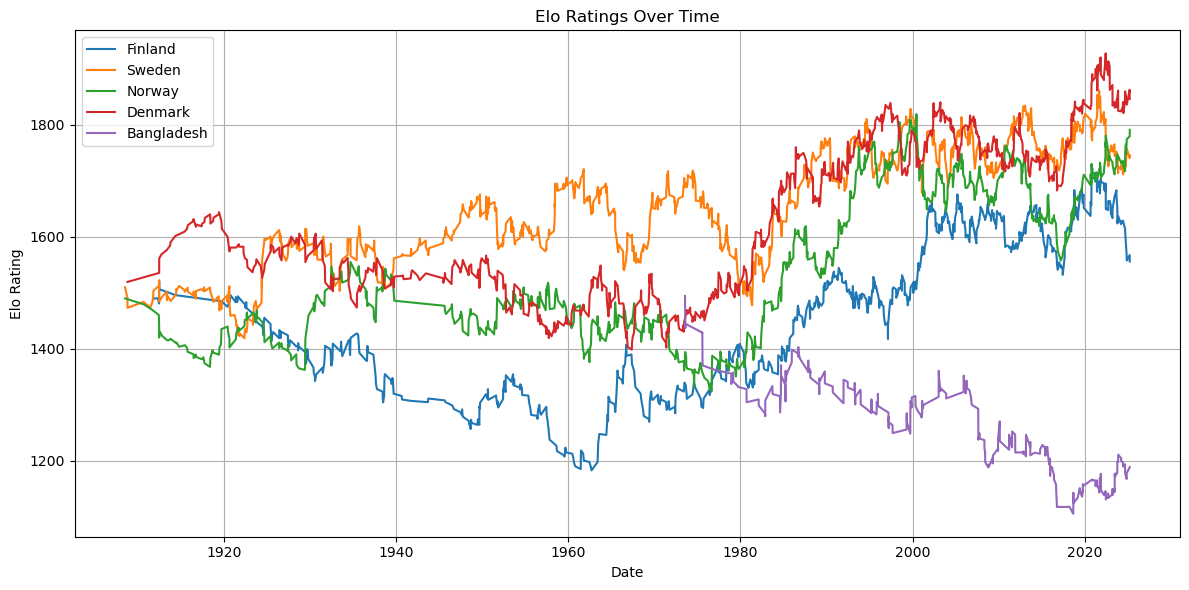

In [235]:
import matplotlib.pyplot as plt

def plot_elo_over_time(elo_df, teams):
    plt.figure(figsize=(12, 6))
    for team in teams:
        team_home = elo_df[elo_df['Home_team'] == team][['Date', 'Home_rating']].rename(columns={'Home_rating': 'Elo'})
        team_away = elo_df[elo_df['Away_team'] == team][['Date', 'Away_rating']].rename(columns={'Away_rating': 'Elo'})
        team_elo = pd.concat([team_home, team_away]).sort_values('Date')
        plt.plot(team_elo['Date'], team_elo['Elo'], label=team)
    
    plt.title('Elo Ratings Over Time')
    plt.xlabel('Date')
    plt.ylabel('Elo Rating')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
plot_elo_over_time(elo_df, ['Finland', 'Sweden', 'Norway', 'Denmark', 'Bangladesh'])
